## Leitura de dados

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
  
# read text file into pandas DataFrame
df = pd.read_csv('Data/DATA.txt', header=None, delimiter="   ", names=['GENDER', 'AGE', 'RF', 'SBP', 'HR1','ST', 'HR2', 'CRT', 'KIL', 'EVENT'])

/var/folders/ff/k5l3wypj7s1gqw9qq5mly9w80000gn/T/ipykernel_97498/3466727068.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('Data/DATA.txt', header=None, delimiter="   ", names=['GENDER', 'AGE', 'RF', 'SBP', 'HR1','ST', 'HR2', 'CRT', 'KIL', 'EVENT'])


## Caracterização dos dados

In [17]:
df.shape

(457, 10)

In [3]:
df.head()

,GENDER,AGE,RF,SBP,HR1,ST,HR2,CRT,KIL,EVENT
0,1.0,33.0,0.0,132.0,91.579173,1.0,90.0,0.8,1.0,0.0
1,1.0,69.0,0.0,147.0,52.785861,0.0,52.0,1.4,1.0,0.0
2,1.0,63.0,0.0,142.0,40.692798,1.0,44.0,1.1,3.0,1.0
3,0.0,79.0,0.0,147.0,106.420820,1.0,110.0,0.9,1.0,1.0
4,0.0,61.0,0.0,107.0,82.148302,0.0,80.0,1.1,1.0,0.0


In [4]:
df.describe()

,GENDER,AGE,RF,SBP,HR1,ST,HR2,CRT,KIL,EVENT
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,0.787746,64.540481,0.153173,131.783370,75.777039,0.531729,75.660832,1.379431,1.212254,0.391685
std,0.409352,11.476473,0.360549,26.692102,17.104161,0.499539,17.563321,1.266251,0.558843,0.488662
min,0.000000,33.000000,0.000000,60.000000,40.692798,0.000000,44.000000,0.600000,1.000000,0.000000
25%,1.000000,56.000000,0.000000,112.000000,63.283457,0.000000,63.000000,1.000000,1.000000,0.000000
50%,1.000000,65.000000,0.000000,132.000000,74.017537,1.000000,74.000000,1.100000,1.000000,0.000000
75%,1.000000,74.000000,0.000000,148.000000,86.231702,1.000000,86.000000,1.300000,1.000000,1.000000
max,1.000000,91.000000,1.000000,221.000000,151.397760,1.000000,153.000000,11.500000,3.000000,1.000000


### Valores nulos

In [5]:
df.isna().all()

GENDER    False
AGE       False
RF        False
SBP       False
HR1       False
ST        False
HR2       False
CRT       False
KIL       False
EVENT     False
dtype: bool

### Correlação

In [6]:
df.corr()

,GENDER,AGE,RF,SBP,HR1,ST,HR2,CRT,KIL,EVENT
GENDER,1.000000,-0.081491,-0.031830,-0.042552,-0.127093,0.059817,-0.122283,0.106213,-0.032702,-0.000072
AGE,-0.081491,1.000000,-0.078879,0.453267,-0.051287,0.172771,0.022432,0.067769,0.098330,0.512749
RF,-0.031830,-0.078879,1.000000,-0.004520,0.058184,0.009485,0.053242,0.045824,0.121270,-0.005202
SBP,-0.042552,0.453267,-0.004520,1.000000,0.207666,0.311444,0.234114,0.094046,0.088064,0.230132
HR1,-0.127093,-0.051287,0.058184,0.207666,1.000000,0.090092,0.988999,0.076152,0.326419,0.120652
ST,0.059817,0.172771,0.009485,0.311444,0.090092,1.000000,0.156075,0.082854,0.066162,0.483510
HR2,-0.122283,0.022432,0.053242,0.234114,0.988999,0.156075,1.000000,0.100669,0.372433,0.258254
CRT,0.106213,0.067769,0.045824,0.094046,0.076152,0.082854,0.100669,1.000000,0.047400,0.188482
KIL,-0.032702,0.098330,0.121270,0.088064,0.326419,0.066162,0.372433,0.047400,1.000000,0.401572
EVENT,-0.000072,0.512749,-0.005202,0.230132,0.120652,0.483510,0.258254,0.188482,0.401572,1.000000


### Histogramas

array([[<Axes: title={'center': 'GENDER'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'RF'}>],
       [<Axes: title={'center': 'SBP'}>, <Axes: title={'center': 'HR1'}>,
        <Axes: title={'center': 'ST'}>],
       [<Axes: title={'center': 'HR2'}>, <Axes: title={'center': 'CRT'}>,
        <Axes: title={'center': 'KIL'}>],
       [<Axes: title={'center': 'EVENT'}>, <Axes: >, <Axes: >]],
      dtype=object)

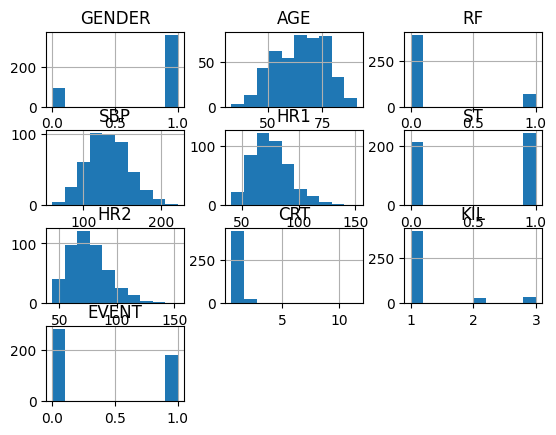

In [7]:
# Plotar histogramas de todas as colunas
df.hist()

### Plot de caracterização de EVENT

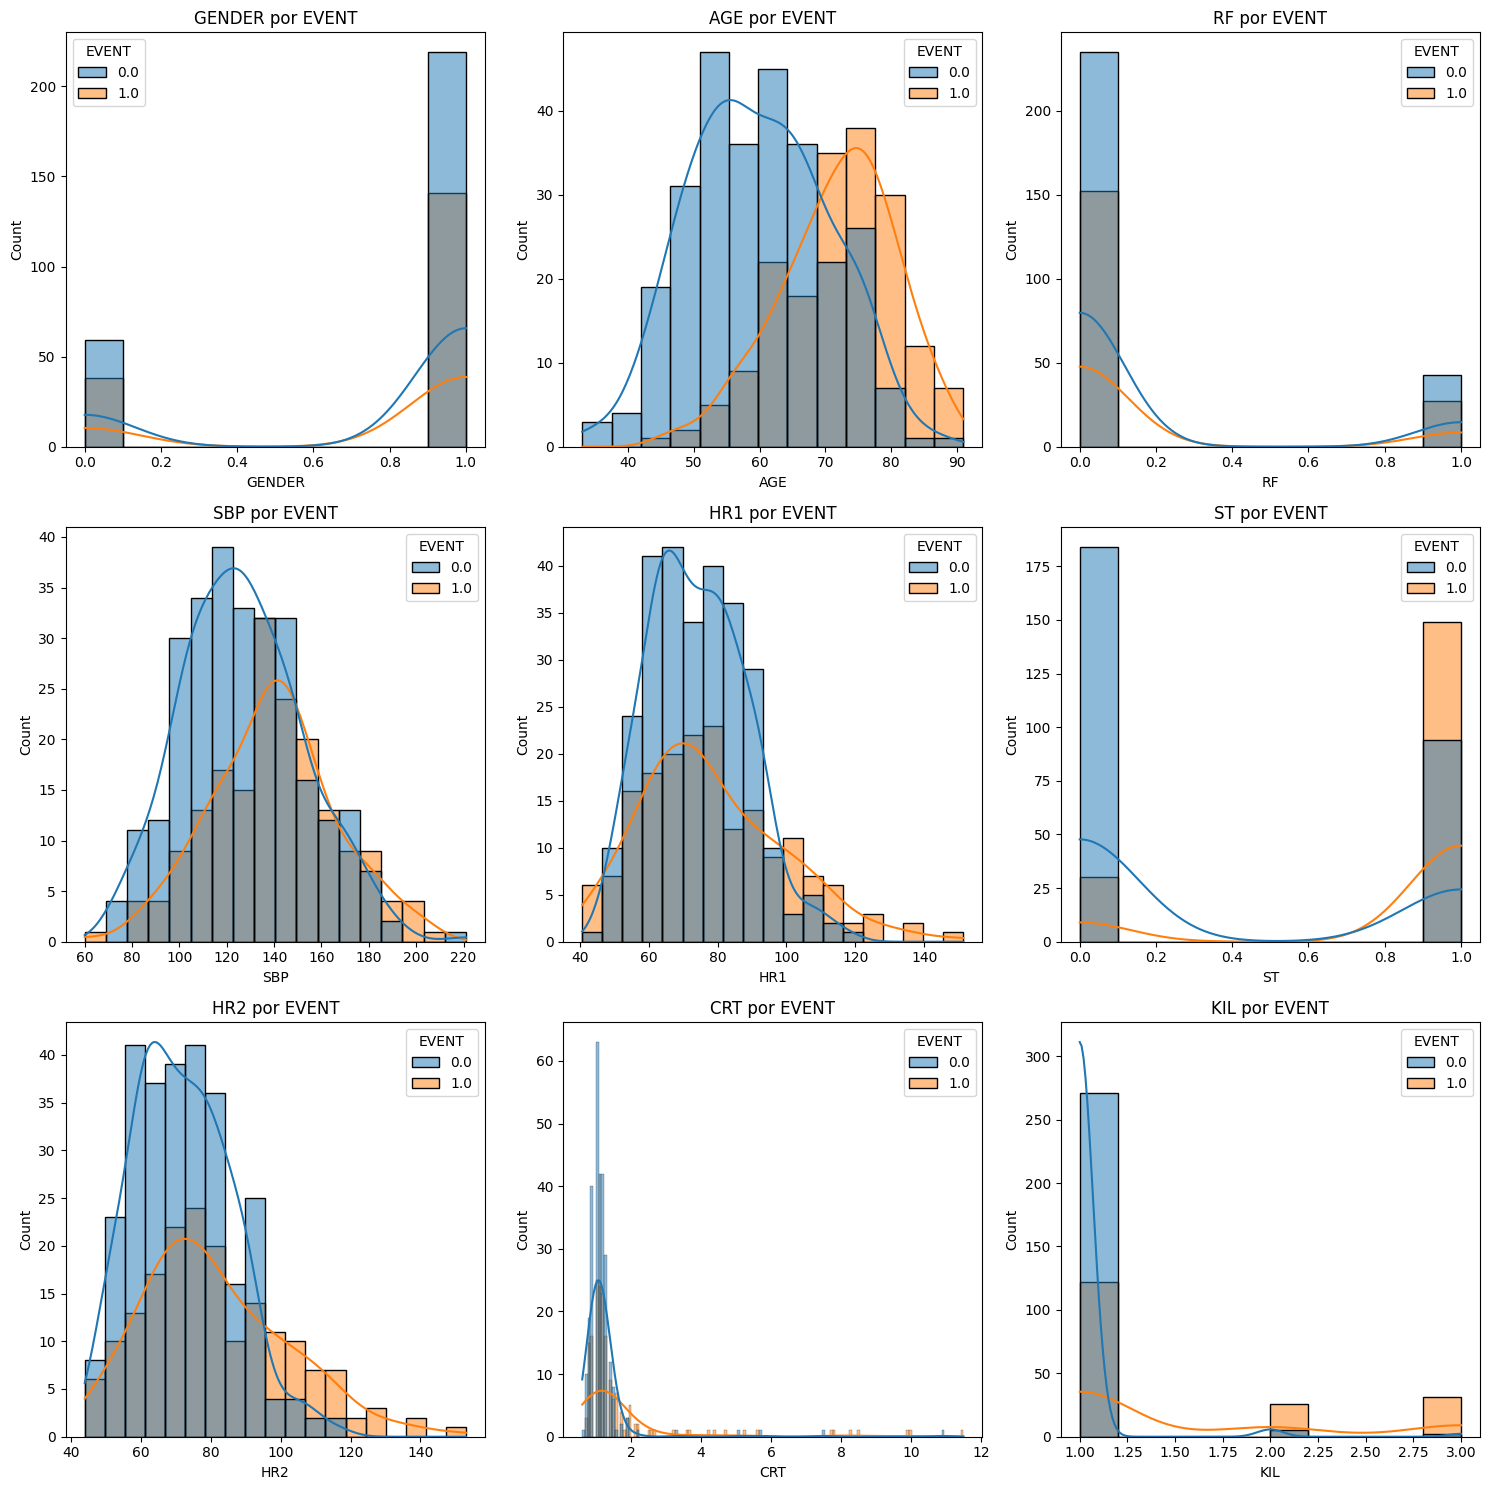

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma matriz de subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Iterar sobre cada coluna e plotar o gráfico em um subplot
for i, column in enumerate(df.columns[:-1]):
    ax = axes[i // 3, i % 3]  # Selecionar o subplot correto
    sns.histplot(data=df, x=column, hue='EVENT', kde=True, ax=ax)  # Plotar o gráfico no subplot
    ax.set_title(f'{column} por EVENT')  # Definir título do subplot

# Ajustar o layout dos subplots
plt.tight_layout()

# Exibir a figura
plt.show()


# Divisão Treino/Teste

In [11]:
def train_test_split(data, split_ratio):
    """
    Divide o conjunto de dados em conjuntos de treinamento e teste.

    Argumentos:
    data -- o conjunto de dados original
    split_ratio -- a proporção do conjunto de dados a ser usada para treinamento

    Retorna:
    train_data -- o conjunto de dados de treinamento
    test_data -- o conjunto de dados de teste
    """
    num_train = int(len(data) * split_ratio)
    train_data = data[:num_train]
    test_data = data[num_train:]
    return train_data, test_data

In [12]:
train_data, test_data = train_test_split(df, 0.7)

# Filtro de Kalman

In [14]:
def kalman_filter(train_data, test_data):
    """
    Aplica o filtro de Kalman aos dados de treinamento e, em seguida, usa o modelo treinado para prever
    se um evento ocorrerá no próximo período de tempo com base nos dados de teste.

    Argumentos:
    train_data -- o conjunto de dados de treinamento
    test_data -- o conjunto de dados de teste

    Retorna:
    predictions -- uma lista de previsões para cada período de tempo nos dados de teste
    """
    # Definir as matrizes do filtro de Kalman
    A = np.array([[1, 1], [0, 1]])
    H = np.array([1, 0]).reshape(1, 2)
    Q = np.array([[0.05, 0.05], [0.05, 0.1]])
    R = np.array([0.5]).reshape(1, 1)

    # Inicializar o estado e o erro de covariância
    x0 = np.array([0, 0]).reshape(2, 1)
    P0 = np.eye(2) * 0.1

    # Iterar sobre os dados de treinamento e aplicar o filtro de Kalman
    for i in range(len(train_data)):
        # Obter a medição atual
        z = np.array(train_data.iloc[i]['EVENT']).reshape(1, 1)

        # Prever o próximo estado e erro de covariância
        x = np.dot(A, x0)
        P = np.dot(np.dot(A, P0), A.T) + Q

        # Calcular a matriz de ganho de Kalman
        K = np.dot(np.dot(P, H.T), np.linalg.inv(np.dot(np.dot(H, P), H.T) + R))

        # Atualizar o estado e erro de covariância com a medição atual
        x = x + np.dot(K, (z - np.dot(H, x)))
        P = np.dot((np.eye(2) - np.dot(K, H)), P)

        # Atualizar estado e erro de covariância para o próximo período de tempo
        x0 = x
        P0 = P

    # Prever se um EVENT ocorrerá no próximo período de tempo com base nos dados de teste
    predictions = []
    for i in range(len(test_data)):
        # Obter a medição atual
        z = np.array(test_data.iloc[i]['EVENT']).reshape(1, 1)

        # Prever o próximo estado e erro de covariância
        x = np.dot(A, x0)
        P = np.dot(np.dot(A, P0), A.T) + Q

        # Calcular a matriz de ganho de Kalman
        K = np.dot(np.dot(P, H.T), np.linalg.inv(np.dot(np.dot(H, P), H.T) + R))
        # Atualizar o estado e erro de covariância com a medição atual
        x = x + np.dot(K, (z - np.dot(H, x)))
        P = np.dot((np.eye(2) - np.dot(K, H)), P)

        # Adicionar a previsão à lista de previsões
        predictions.append(x[0, 0])

        # Converte as previsões em valores binários (0 ou 1)
        predictions_binary = [1 if p >= 0.5 else 0 for p in predictions]

        # Atualizar estado e erro de covariância para o próximo período de tempo
        x0 = x
        P0 = P

    return predictions_binary


In [15]:
predictions = kalman_filter(train_data, test_data)

# Calcular a precisão das previsões
correct_predictions = 0
for i in range(len(predictions)):
    if (predictions[i] == 1 and test_data.iloc[i]['EVENT'] == 1) or (predictions[i] == 0 and test_data.iloc[i]['EVENT'] == 0):
        correct_predictions += 1
accuracy = correct_predictions / len(predictions)

print('Precisão: {:.2f}%'.format(accuracy * 100))

Precisão: 100.00%


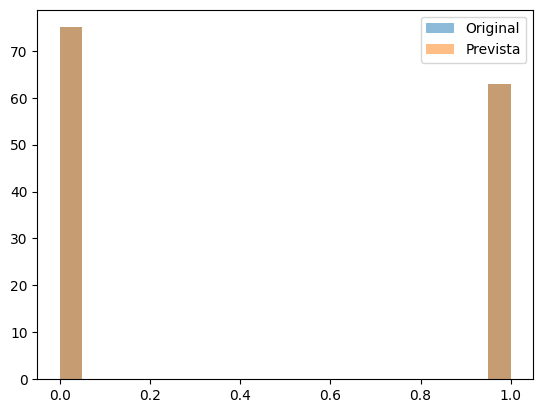

In [16]:
# Plotar os histogramas
plt.hist(test_data['EVENT'], bins=20, alpha=0.5, label='Original')
plt.hist(predictions, bins=20, alpha=0.5, label='Prevista')
plt.legend()
plt.show()
